 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [196]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [197]:
whale_data = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [198]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [199]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [200]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [201]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [202]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [203]:
# Reading S&P TSX 60 Closing Prices
sp_data = Path("Resources/sp_tsx_history.csv")
sp_history = pd.read_csv(sp_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [204]:
# Check Data Types
sp_history.dtypes

Close    object
dtype: object

In [205]:
# Fix Data Types
sp_history['Close'] = sp_history['Close'].replace('[$,]', '', regex=True).astype(float)
print(sp_history.dtypes)


Close    float64
dtype: object


In [206]:
# Calculate Daily Returns 
daily_returns = sp_history.pct_change()
daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [207]:
# Drop Nulls
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

Close    0
dtype: int64

In [208]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.rename(columns={'Close': 'SP Close'}, inplace=True)
daily_returns.head()

,SP Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [209]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([daily_returns, algo_returns, whale_returns], axis="columns", join="inner")
combined_data = combined_data.sort_index()
combined_data.head()

,SP Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

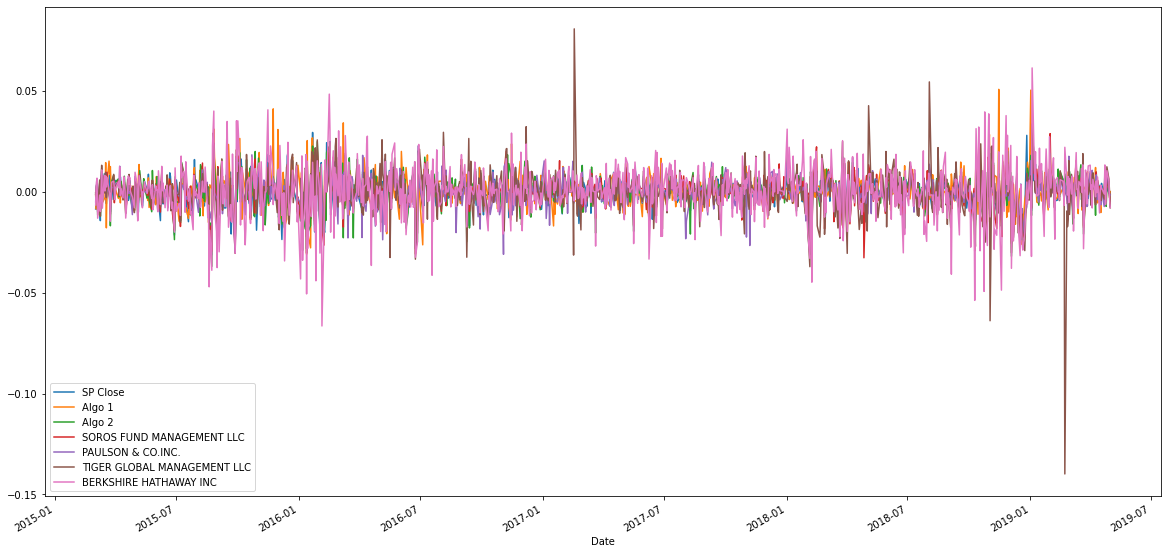

In [210]:
# Plot daily returns of all portfolios
combined_data.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

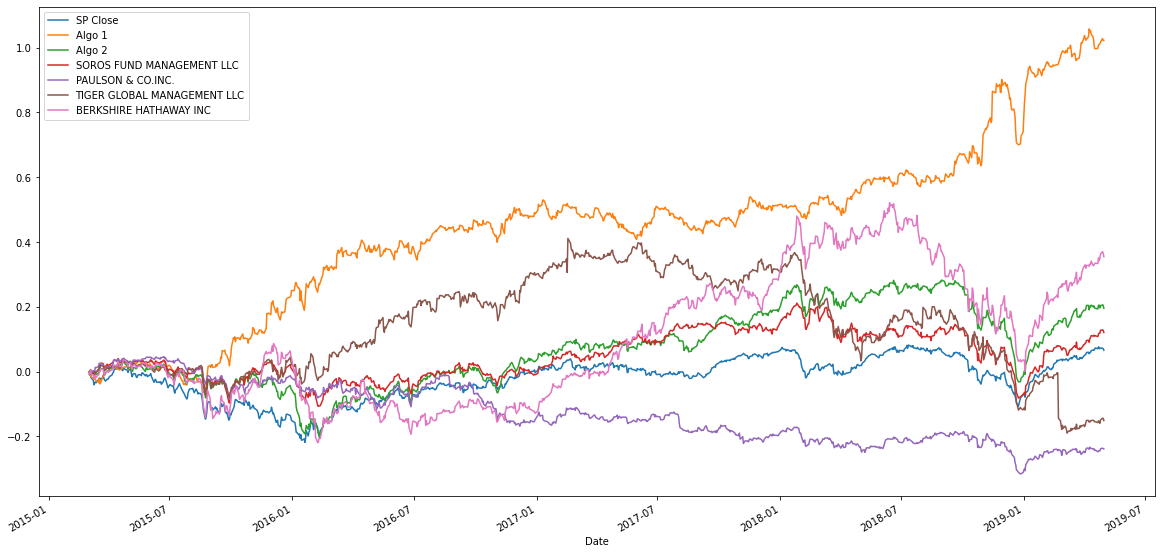

In [211]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_data).cumprod() - 1
cumulative_returns.head() 

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

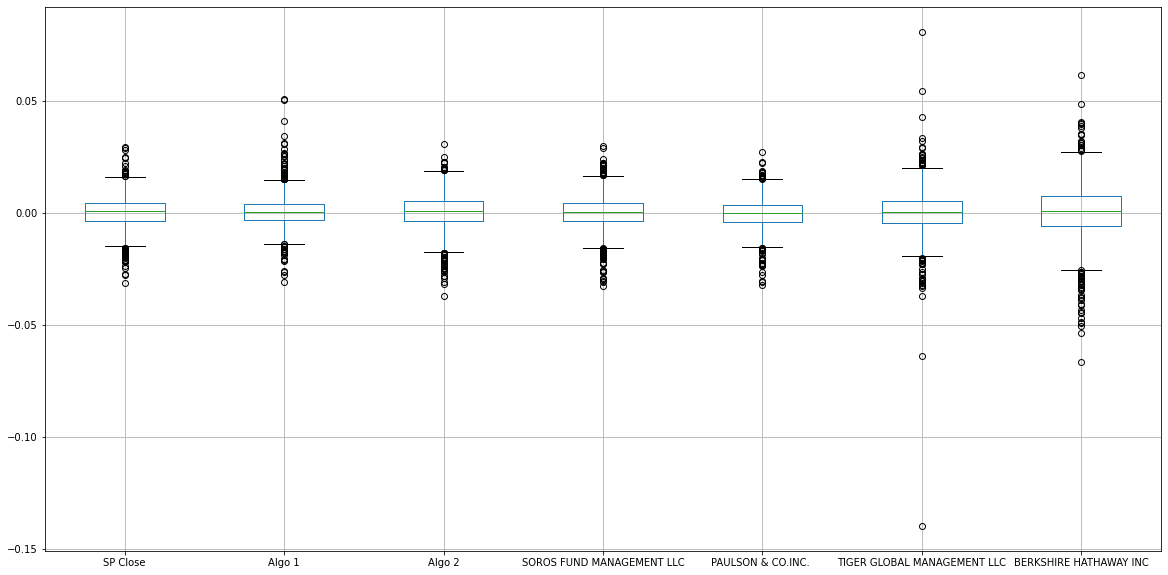

In [212]:
# Box plot to visually show risk
combined_data.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [213]:
combined_data.head()
combined_data.isnull().sum()

SP Close                       0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [214]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_data.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
SP Close                       0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [215]:
# Determine which portfolios are riskier than the S&P TSX 60
print(f"Portfolios riskier than the S&P60 include:")
print(str(daily_std[0:5]))

Portfolios riskier than the S&P60 include:
BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
dtype: float64


### Calculate the Annualized Standard Deviation

In [216]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
SP Close                       0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

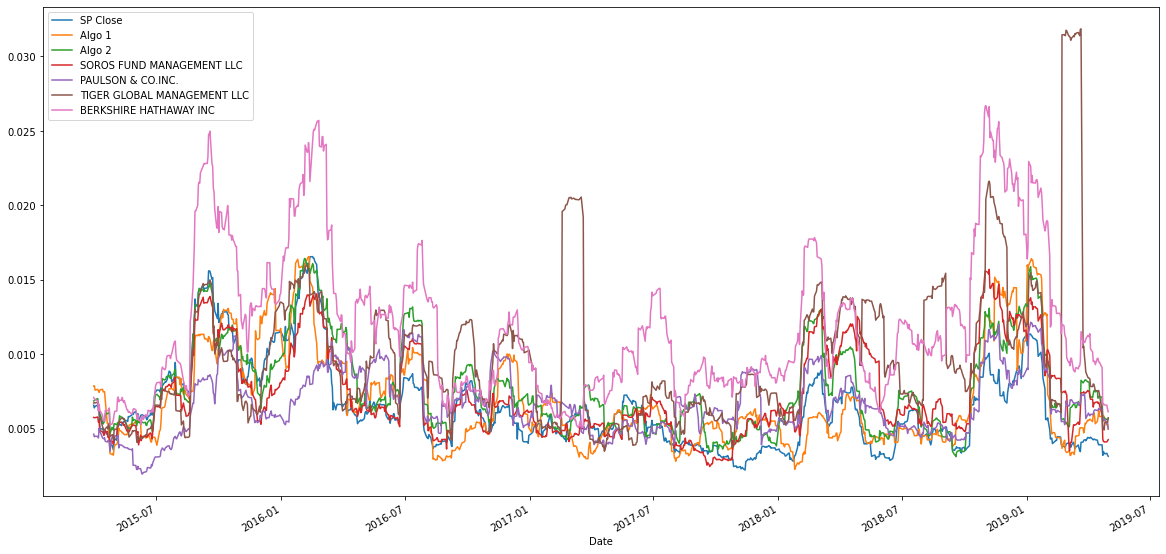

In [217]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_data.rolling(window=21).std()


# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

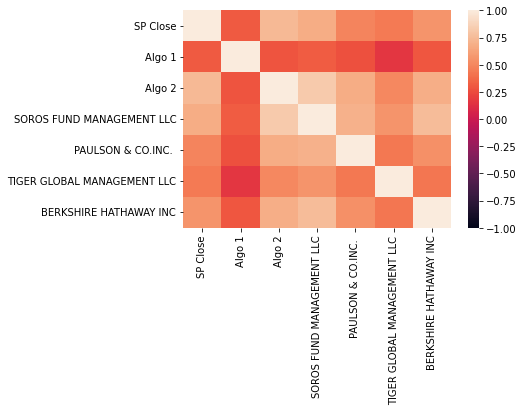

In [218]:
import seaborn as sns
# Calculate the correlation
price_correlation = combined_data.corr()

# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

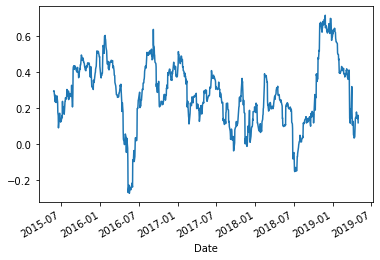

In [219]:
# Calculate covariance of a single portfolio
covariance_algo1 = combined_data['Algo 1'].rolling(window=60).cov(combined_data['SP Close'])


# Calculate variance of S&P TSX
variance = combined_data['SP Close'].rolling(window=60).var()

# Computing beta
algo1_beta = covariance_algo1 / variance


# Plot beta trend
algo1_beta.plot()




## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [220]:
# Use `ewm` to calculate the rolling window
combined_data.ewm(halflife='21 days', times=combined_data.index).mean()

,SP Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.005908,-0.005320,0.000761,0.000511,-0.000802,-0.001532,-0.001089
2015-03-05,-0.003410,-0.003817,0.001988,0.001718,0.000878,-0.000193,0.001603
2015-03-06,-0.005133,-0.004116,-0.001542,-0.000808,-0.000291,-0.002369,-0.002256
2015-03-09,-0.005452,-0.004415,-0.000903,-0.000496,0.000724,-0.000524,-0.002121
...,...,...,...,...,...,...,...
2019-04-25,0.001036,0.000432,0.000835,0.001442,-0.000019,-0.000738,0.001975
2019-04-26,0.001092,0.000549,0.001039,0.001751,0.000404,-0.000134,0.002365
2019-04-29,0.001001,0.000775,0.001126,0.001727,0.000516,0.000175,0.002504


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [221]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))

# Display sharpe ratios
sharpe_ratios

SP Close                       0.195550
Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of Portfolios'}>

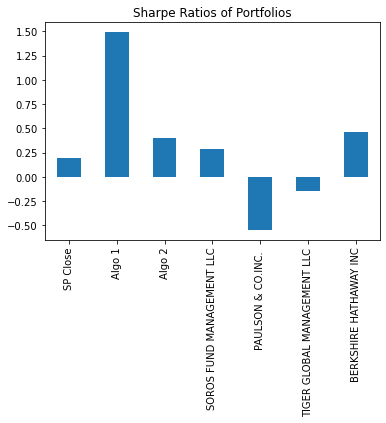

In [222]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios of Portfolios")

In [223]:
sharpe_ratios

SP Close                       0.195550
Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

 #Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 has outperformed both the market and the whales portfolios\

Algo2 outperfomed SP60, not whale portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [224]:
# Reading data from 1st stock
gs_data = Path("Resources/goldman.csv")
gs_history = pd.read_csv(gs_data, index_col="Date", infer_datetime_format=True, parse_dates=True,  usecols=["Date", "Close"])
gs_history.head()

,Close
Date,
2014-01-02,176.89
2014-01-03,178.15
2014-01-06,179.37
2014-01-07,178.29
2014-01-08,178.44


In [225]:
# Reading data from 2nd stock
jpmorgan_data = Path("Resources/jpmorgan.csv")
jpm_history = pd.read_csv(jpmorgan_data, index_col="Date", infer_datetime_format=True, parse_dates=True,  usecols=["Date", "Close"])
jpm_history

,Close
Date,
2014-01-02,58.21
2014-01-03,58.66
2014-01-06,59.00
2014-01-07,58.32
2014-01-08,58.87
...,...
2021-12-23,157.26
2021-12-27,158.16
2021-12-28,158.64


In [226]:
# Reading data from 3rd stock
tesla_data = Path("Resources/tesla.csv")
tesla_history = pd.read_csv(tesla_data, index_col="Date", infer_datetime_format=True, parse_dates=True, usecols=["Date", "Close"])
tesla_history

,Close
Date,
2014-01-02,30.02
2014-01-03,29.91
2014-01-06,29.40
2014-01-07,29.87
2014-01-08,30.26
...,...
2021-12-23,1067.00
2021-12-27,1093.94
2021-12-28,1088.47


In [227]:
tesla_history['Close'] = tesla_history['Close'].replace('[$,]', '', regex=True).astype(float)
print(tesla_history.dtypes)

Close    float64
dtype: object


In [228]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([gs_history, jpm_history, tesla_history], axis="columns", join="inner" )
combined_stocks

,Close,Close,Close
Date,,,
2014-01-02,176.89,58.21,30.02
2014-01-03,178.15,58.66,29.91
2014-01-06,179.37,59.00,29.40
2014-01-07,178.29,58.32,29.87
2014-01-08,178.44,58.87,30.26
...,...,...,...
2021-12-23,385.04,157.26,1067.00
2021-12-27,388.04,158.16,1093.94
2021-12-28,387.61,158.64,1088.47


In [229]:
print(combined_stocks.dtypes)

Close    float64
Close    float64
Close    float64
dtype: object


In [230]:
# Reset Date index
combined_stocks_reset = combined_stocks.reset_index()
combined_stocks_reset.set_index("Date", inplace=True)
combined_stocks_reset

,Close,Close,Close
Date,,,
2014-01-02,176.89,58.21,30.02
2014-01-03,178.15,58.66,29.91
2014-01-06,179.37,59.00,29.40
2014-01-07,178.29,58.32,29.87
2014-01-08,178.44,58.87,30.26
...,...,...,...
2021-12-23,385.04,157.26,1067.00
2021-12-27,388.04,158.16,1093.94
2021-12-28,387.61,158.64,1088.47


In [231]:
# Reorganize portfolio data by having a column per symbol
combined_stocks_reset.columns = ['Goldman', 'JPMorgan', 'Telsa']
combined_stocks_reset

,Goldman,JPMorgan,Telsa
Date,,,
2014-01-02,176.89,58.21,30.02
2014-01-03,178.15,58.66,29.91
2014-01-06,179.37,59.00,29.40
2014-01-07,178.29,58.32,29.87
2014-01-08,178.44,58.87,30.26
...,...,...,...
2021-12-23,385.04,157.26,1067.00
2021-12-27,388.04,158.16,1093.94
2021-12-28,387.61,158.64,1088.47


In [232]:
# Calculate daily returns
stock_returns = combined_stocks_reset.pct_change()

# Drop NAs
stock_returns = stock_returns.dropna().copy()

# Display sample data
stock_returns

,Goldman,JPMorgan,Telsa
Date,,,
2014-01-03,0.007123,0.007731,-0.003664
2014-01-06,0.006848,0.005796,-0.017051
2014-01-07,-0.006021,-0.011525,0.015986
2014-01-08,0.000841,0.009431,0.013057
2014-01-09,-0.005828,-0.001869,-0.024785
...,...,...,...
2021-12-23,0.007088,0.003574,0.057619
2021-12-27,0.007791,0.005723,0.025248
2021-12-28,-0.001108,0.003035,-0.005000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [233]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stock_returns
stock_portfolio_return = stock_returns.dot(weights)

# Display sample data
stock_portfolio_return

Date
2014-01-03    0.003730
2014-01-06   -0.001469
2014-01-07   -0.000520
2014-01-08    0.007776
2014-01-09   -0.010827
                ...   
2021-12-23    0.022760
2021-12-27    0.012921
2021-12-28   -0.001025
2021-12-29   -0.002079
2021-12-30   -0.005619
Length: 2013, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [234]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([stock_portfolio_return, combined_data], axis="columns", join="inner")
all_returns.rename(columns={0: 'Custom'}, inplace=True)
all_returns.head()

,Custom,SP Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2015-03-03,0.003891,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002916,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.002941,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.022740,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000001,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


In [235]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna()
all_returns

,Custom,SP Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2015-03-03,0.003891,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002916,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.002941,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.022740,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000001,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...,...
2019-04-25,-0.012571,-0.000628,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,-0.011521,0.002254,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.020038,-0.000788,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [236]:
# Calculate the annualized `std`
all_returns_std  = all_returns.std()
all_returns_std

Custom                         0.014462
SP Close                       0.007034
Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

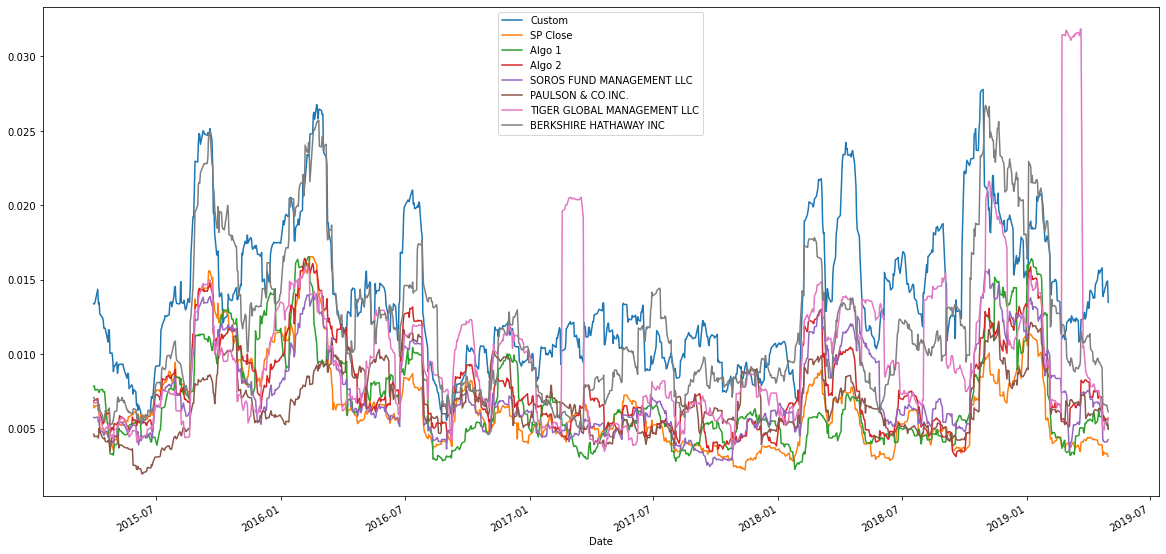

In [237]:
# Calculate rolling standard deviation
all_rolling_std = all_returns.rolling(window=21).std()


# Plot the rolling standard deviation
all_rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

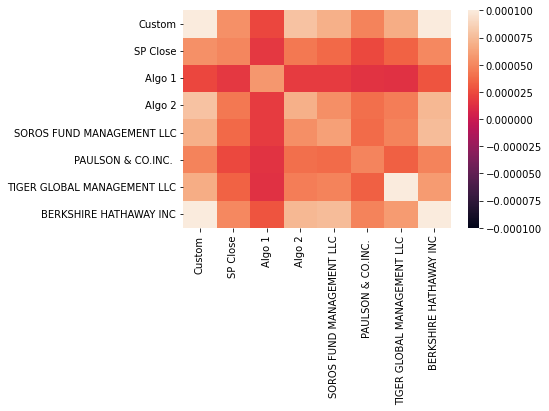

In [262]:
# Calculate and plot the correlation
price_correlation_all = all_returns.cov()
sns.heatmap(price_correlation_all, vmin=-0.0001, vmax=0.0001)



### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [48]:
print(all_returns)

              Custom  SP Close    Algo 1    Algo 2  SOROS FUND MANAGEMENT LLC  \
Date                                                                            
2019-03-11  0.013501  0.006879  0.000069  0.012871                   0.015435   
2019-03-12 -0.008519  0.001889  0.004394  0.002797                  -0.000180   
2019-03-13  0.008760  0.000825 -0.006889  0.003847                   0.002724   
2019-03-14  0.004559 -0.003865 -0.010810  0.007894                  -0.000275   
2019-03-15 -0.011507  0.003282  0.001960  0.003873                   0.003264   
2019-03-18  0.001880  0.006878  0.003461  0.013356                   0.006692   
2019-03-19 -0.005971 -0.003893 -0.002133 -0.000504                   0.000154   
2019-03-20 -0.010721 -0.001269 -0.009167  0.001009                  -0.004683   
2019-03-21 -0.004329  0.004764  0.000035  0.004714                   0.015109   
2019-03-22 -0.031201 -0.009558  0.002514 -0.020949                  -0.017664   
2019-03-25 -0.008796 -0.0014

<AxesSubplot:xlabel='Date'>

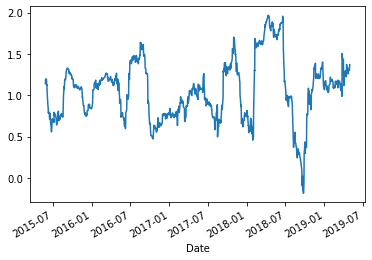

In [243]:
# Calculate covariance of a single portfolio
covariance_custom = all_returns['Custom'].rolling(window=60).cov(all_returns['SP Close'])

# Calculate variance of S&P TSX
variance = all_returns['SP Close'].rolling(window=60).var()

# Computing beta
covariance_beta = covariance_custom / variance


# Plot beta trend
covariance_beta.plot()





### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [240]:
# Calculate Annualized Sharpe Ratios
all_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
all_ratios.head()

Custom                       0.496508
SP Close                     0.195550
Algo 1                       1.491514
Algo 2                       0.396817
SOROS FUND MANAGEMENT LLC    0.286709
dtype: float64

<AxesSubplot:>

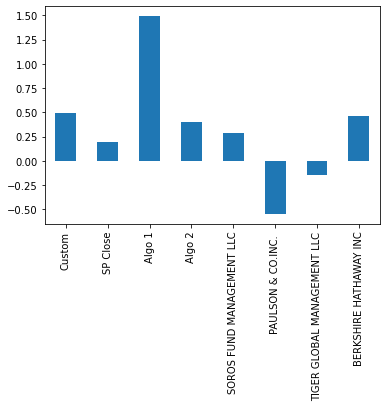

In [241]:
# Visualize the sharpe ratios as a bar plot
all_ratios.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [257]:
sharpe_dict = dict(all_ratios)
print(f"Custom Portfolio is ({all_ratios['Custom']})")
print("----------------------------------------------")
for portfolio in sharpe_dict:
    if portfolio != "Custom":
        result = "The Custom Portfolio outperformed" if (sharpe_dict["Custom"] > sharpe_ratios[portfolio]) else "The Custom Portfolio has underperformed"
        print(f"{result}: {portfolio} SR ({sharpe_dict[portfolio]})")

Custom Portfolio is (0.4965084091348968)
----------------------------------------------
The Custom Portfolio outperformed: SP Close SR (0.19555028784301404)
The Custom Portfolio has underperformed: Algo 1 SR (1.4915139113899516)
The Custom Portfolio outperformed: Algo 2 SR (0.3968171638196935)
The Custom Portfolio outperformed: SOROS FUND MANAGEMENT LLC SR (0.2867088011085044)
The Custom Portfolio outperformed: PAULSON & CO.INC.  SR (-0.5475939566788419)
The Custom Portfolio outperformed: TIGER GLOBAL MANAGEMENT LLC SR (-0.14445528989402717)
The Custom Portfolio outperformed: BERKSHIRE HATHAWAY INC SR (0.4670452414147496)
